# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

---
Dataset yang digunakan dalam proyek ini adalah **PISA Performance Scores by Country** yang dapat diunduh dari Kaggle. Dataset ini termasuk dalam kategori data sekunder karena telah tersedia di repositori publik. Dataset ini digunakan untuk analisis clustering guna memahami kekuatan dan kelemahan pendidikan regional berdasarkan skor PISA (Programme for International Student Assessment).  

**Sumber Dataset**:  
- **Sumber**: [Kaggle - PISA Performance Scores by Country](https://www.kaggle.com/datasets/thedevastator/pisa-performance-scores-by-country/data)  
- **Jenis Data**: Data sekunder  

**Deskripsi Dataset**:  
- **Jumlah Baris**: 2087  baris data
- **Jumlah Kolom**: 6 kolom, terdiri dari kombinasi data numerikal dan kategorikal.  

**Fitur Dataset**:  

**Kolom Kategorikal**:  
1. `LOCATION`: Kode unik setiap negara alpha-3 sesuai standar ISO 3166-1 alpha-3. Nilai khusus "OAVG" menunjukkan rata-rata dari semua negara anggota OECD.  
2. `INDICATOR`: Indikator performa yang diukur, yaitu: Reading performance (PISAREAD), Mathematical performance (PISAMATH), atau Scientific performance (PISASCIENCE).  
3. `SUBJECT`: Kategori subjek berdasarkan kelompok: BOY (laki-laki), GIRL (perempuan), atau TOT (total).

**Kolom Numerik**:  
1. `INDEX`: Indeks baris data
2. `TIME`: Tahun di mana skor performa diukur (2000 hingga 2018).  
3. `Value`: Skor rata-rata dari indikator performa untuk subjek tertentu dan tahun tertentu (PISA score).  

**Tema Dataset**:  
- **Data Pendidikan**:  
Dataset ini berfokus pada penilaian performa siswa dalam tiga subjek utama (Matematika, Membaca, dan Sains) di berbagai negara. Data ini digunakan untuk mendeteksi pola kekuatan dan kelemahan regional dalam pendidikan serta mendukung kebijakan berbasis data untuk meningkatkan kualitas pendidikan secara global.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [121]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [122]:
# Muat dataset
data = pd.read_csv('/content/dataset_clustering.csv')
data.head()

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
0,0,AUS,PISAMATH,BOY,2003,527.000
1,1,AUS,PISAMATH,BOY,2006,527.000
2,2,AUS,PISAMATH,BOY,2009,519.000
3,3,AUS,PISAMATH,BOY,2012,510.115
4,4,AUS,PISAMATH,BOY,2015,497.000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [123]:
# Tampilkan informasi umum tentang dataset
print("Informasi dataset:")
data.info()

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      2087 non-null   int64  
 1   LOCATION   2087 non-null   object 
 2   INDICATOR  2087 non-null   object 
 3   SUBJECT    2087 non-null   object 
 4   TIME       2087 non-null   int64  
 5   Value      2087 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 98.0+ KB


In [124]:
# Tinjau jumlah baris dan kolom
print("Jumlah baris dan kolom dalam dataset:", data.shape)

# Tinjau jenis data (numerik & kategorikal)
kolom_numerik = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nKolom Numerik:", kolom_numerik)
kolom_kategorik = data.select_dtypes(include=['object']).columns.tolist()
print("Kolom Kategorikal:", kolom_kategorik)

Jumlah baris dan kolom dalam dataset: (2087, 6)

Kolom Numerik: ['index', 'TIME', 'Value']
Kolom Kategorikal: ['LOCATION', 'INDICATOR', 'SUBJECT']


In [125]:
# Menampilkan statistik deskriptif untuk variabel numerik
data.describe()

,index,TIME,Value
count,2087.000000,2087.000000,2087.000000
mean,1043.000000,2010.814087,487.644684
std,602.609326,5.317975,38.644532
min,0.000000,2000.000000,348.000000
25%,521.500000,2006.000000,475.000000
50%,1043.000000,2012.000000,495.000000
75%,1564.500000,2015.000000,512.000000
max,2086.000000,2018.000000,574.000000


In [126]:
# Cek missing value
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0


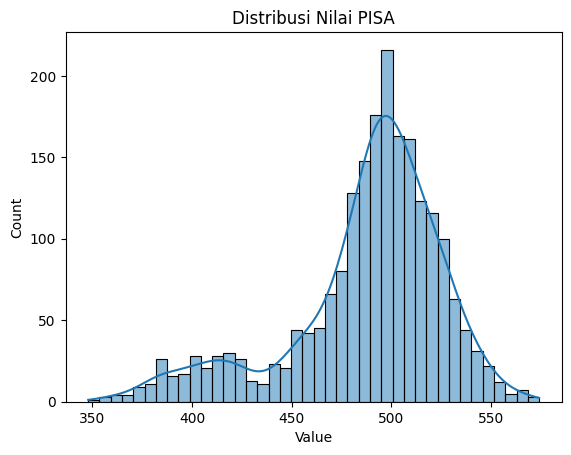

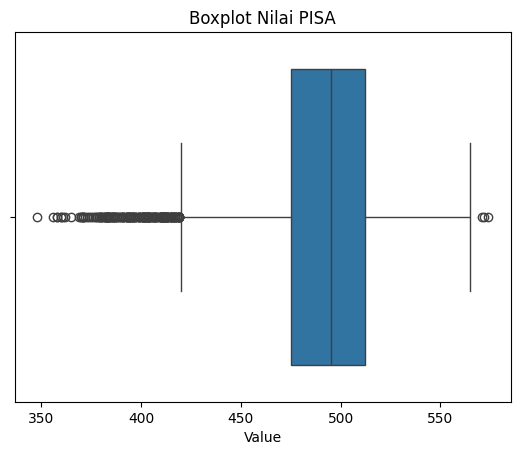

In [127]:
# Histogram untuk nilai PISA
sns.histplot(data['Value'], kde=True)
plt.title('Distribusi Nilai PISA')
plt.show()

# Boxplot untuk melihat pencilan
sns.boxplot(x=data['Value'])
plt.title('Boxplot Nilai PISA')
plt.show()

Fitur `Value` memiliki outlier yang harus ditangani

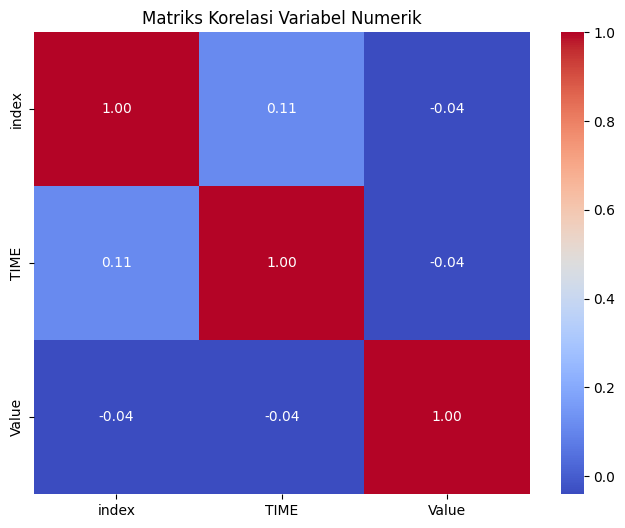

In [128]:
# Matriks korelasi untuk melihat korelasi antarvariabel numerik
correlation_matrix = data[numerical_columns].corr()

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

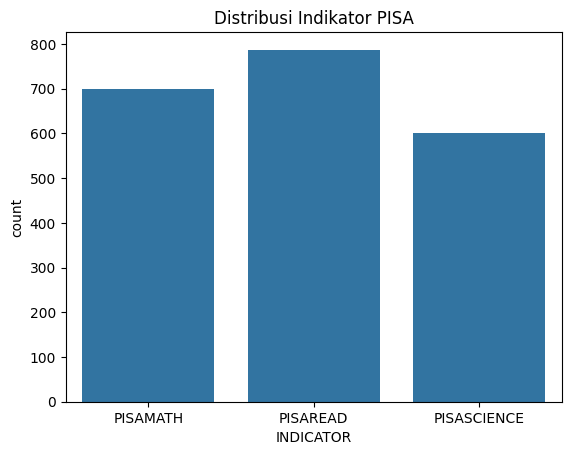

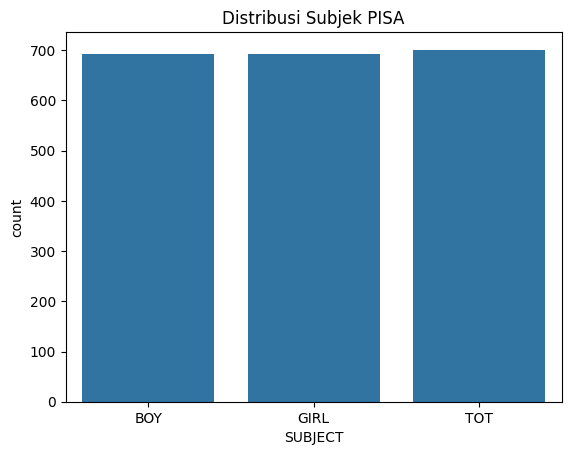

In [129]:
# Visualisasi jumlah negara berdasarkan indikator dan subjek
sns.countplot(x='INDICATOR', data=data)
plt.title('Distribusi Indikator PISA')
plt.show()

sns.countplot(x='SUBJECT', data=data)
plt.title('Distribusi Subjek PISA')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [130]:
# Cek duplikasi data
print("Duplicates: ", data.duplicated().sum())

Duplicates:  0


In [131]:
# Menghitung IQR untuk mendeteksi outlier
Q1 = data['Value'].quantile(0.25)
Q3 = data['Value'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring data yang tidak termasuk outlier
data_no_outliers = data[(data['Value'] >= lower_bound) & (data['Value'] <= upper_bound)]

# Menampilkan jumlah data sebelum dan setelah menghapus outlier
print(f'Jumlah data sebelum menghapus outlier: {len(data)}')
print(f'Jumlah data setelah menghapus outlier: {len(data_no_outliers)}')

Jumlah data sebelum menghapus outlier: 2087
Jumlah data setelah menghapus outlier: 1898


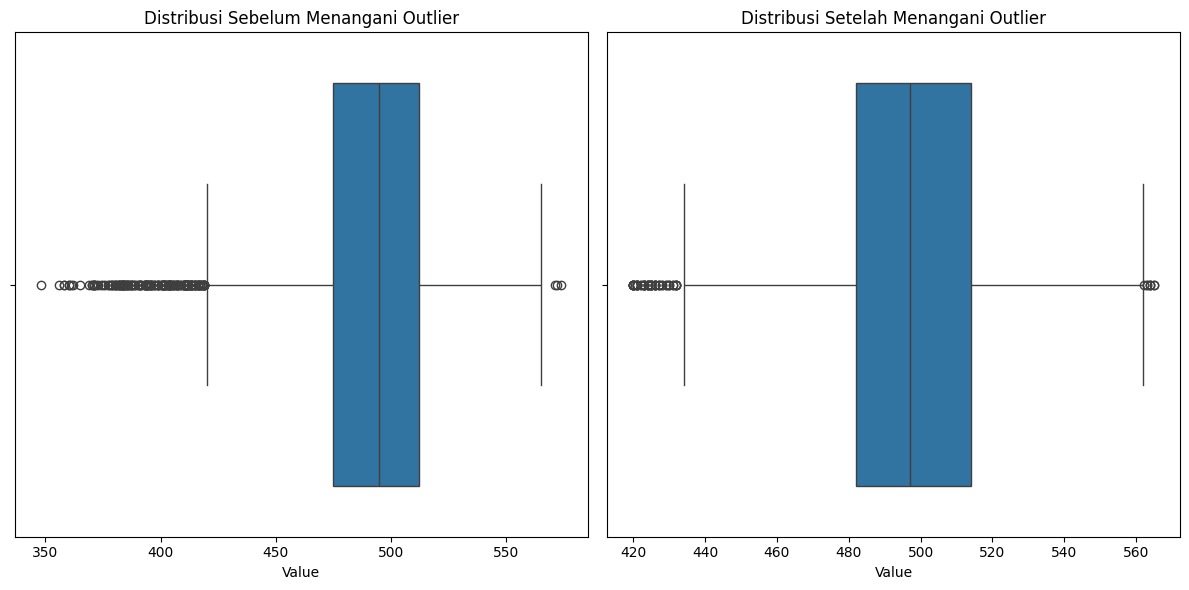

In [132]:
# Visualisasi distribusi sebelum dan sesudah menangani outlier
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['Value'])
plt.title('Distribusi Sebelum Menangani Outlier')

plt.subplot(1, 2, 2)
sns.boxplot(x=data_no_outliers['Value'])
plt.title('Distribusi Setelah Menangani Outlier')

plt.tight_layout()
plt.show()

In [133]:
# Standarisasi nilai numerik
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_no_outliers[['Value']])

In [134]:
# Label encoding untuk fitur kategotikal
for column in ['LOCATION', 'INDICATOR', 'SUBJECT']:
    data[f'{column}_encoded'] = data[column].astype('category').cat.codes

In [135]:
data.head()

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value,LOCATION_encoded,INDICATOR_encoded,SUBJECT_encoded
0,0,AUS,PISAMATH,BOY,2003,527.000,0,0,0
1,1,AUS,PISAMATH,BOY,2006,527.000,0,0,0
2,2,AUS,PISAMATH,BOY,2009,519.000,0,0,0
3,3,AUS,PISAMATH,BOY,2012,510.115,0,0,0
4,4,AUS,PISAMATH,BOY,2015,497.000,0,0,0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

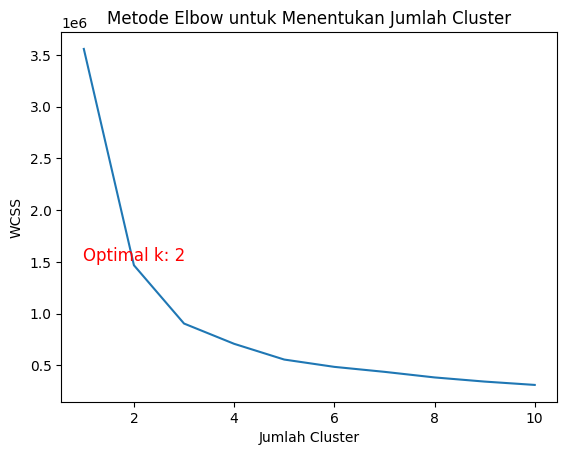

In [136]:
# Tentukan fitur yang digunakan untuk clustering
data_clustering = data[['Value', 'LOCATION_encoded', 'INDICATOR_encoded', 'SUBJECT_encoded', 'TIME']]

# Tentukan jumlah cluster optimal menggunakan Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_clustering)
    wcss.append(kmeans.inertia_)

# Menghitung perubahan WCSS antara setiap titik
wcss_diff = np.diff(wcss)

# Menentukan k optimal berdasarkan perubahan terbesar dalam WCSS
optimal_k = np.argmin(wcss_diff) + 2  # Menambahkan 2 karena diff menghasilkan satu elemen lebih sedikit

# Plot Elbow method
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')

# Menambahkan teks pada grafik untuk menunjukkan k optimal
plt.text(optimal_k, wcss[optimal_k - 1], f'Optimal k: {optimal_k}', ha='center', va='bottom', fontsize=12, color='red')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [137]:
# Menentukan jumlah cluster optimal
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_clustering)

# Menampilkan hasil clustering dan jumlah data di setiap cluster
print(data.head())
print(f'\nJumlah data di setiap cluster:\n{data["Cluster"].value_counts()}')

   index LOCATION INDICATOR SUBJECT  TIME    Value  LOCATION_encoded  \
0      0      AUS  PISAMATH     BOY  2003  527.000                 0   
1      1      AUS  PISAMATH     BOY  2006  527.000                 0   
2      2      AUS  PISAMATH     BOY  2009  519.000                 0   
3      3      AUS  PISAMATH     BOY  2012  510.115                 0   
4      4      AUS  PISAMATH     BOY  2015  497.000                 0   

   INDICATOR_encoded  SUBJECT_encoded  Cluster  
0                  0                0        0  
1                  0                0        0  
2                  0                0        0  
3                  0                0        0  
4                  0                0        0  

Jumlah data di setiap cluster:
Cluster
0    1695
1     392
Name: count, dtype: int64


In [138]:
# Hitung silhouette score
silhouette_avg = silhouette_score(data_clustering, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5779367929422345


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [139]:
# Feature selection dengan Mutual Information

# Hitung informasi mutual antara fitur dan target
mutual_info = mutual_info_classif(data[['Value', 'LOCATION_encoded', 'INDICATOR_encoded', 'SUBJECT_encoded', 'TIME']], data['Cluster'])

# Pilih top 2 fitur berdasarkan informasi mutual tertinggi
selected_features = np.array(['Value', 'LOCATION_encoded', 'INDICATOR_encoded', 'SUBJECT_encoded', 'TIME'])[np.argsort(mutual_info)[-2:]]
print("Fitur yang dipilih berdasarkan Mutual Information:", selected_features)

Fitur yang dipilih berdasarkan Mutual Information: ['LOCATION_encoded' 'Value']


In [140]:
# Feature selection dengan Recursive Feature Elimination (RFE)

# Model dasar untuk seleksi
model = RandomForestClassifier(random_state=42)

# RFE untuk seleksi fitur
rfe = RFE(estimator=model, n_features_to_select=2)
rfe.fit(data[['Value', 'LOCATION_encoded', 'INDICATOR_encoded', 'SUBJECT_encoded', 'TIME']], data['Cluster'])

# Pilih fitur yang terpilih oleh RFE
selected_features = np.array(['Value', 'LOCATION_encoded', 'INDICATOR_encoded', 'SUBJECT_encoded', 'TIME'])[rfe.support_]
print("Fitur yang dipilih oleh RFE:", selected_features)

Fitur yang dipilih oleh RFE: ['Value' 'LOCATION_encoded']


In [141]:
# Pemodelan dan evaluasi kembali
data_selected = data[['Value', 'LOCATION_encoded']]

# Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_selected = kmeans.fit_predict(data_selected)

# Evaluasi dengan silhouette score
from sklearn.metrics import silhouette_score
score_selected = silhouette_score(data_selected, clusters_selected)
print(f"Silhouette Score setelah Feature Selection: {score_selected}")

Silhouette Score setelah Feature Selection: 0.5917290279821765


Kesimpulan Feature Selection:
- Kedua metode **Mutual Information** dan **RFE** memilih fitur yang sama: ``Value`` dan ``LOCATION_encoded``. Ini menunjukkan bahwa kedua fitur ini memiliki kontribusi yang signifikan dalam membentuk atau memprediksi cluster dalam dataset.
- Silhouette score meningkat setelah dilakukan pemodelan kembali dengan fitur yang dipilih dari hasil feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

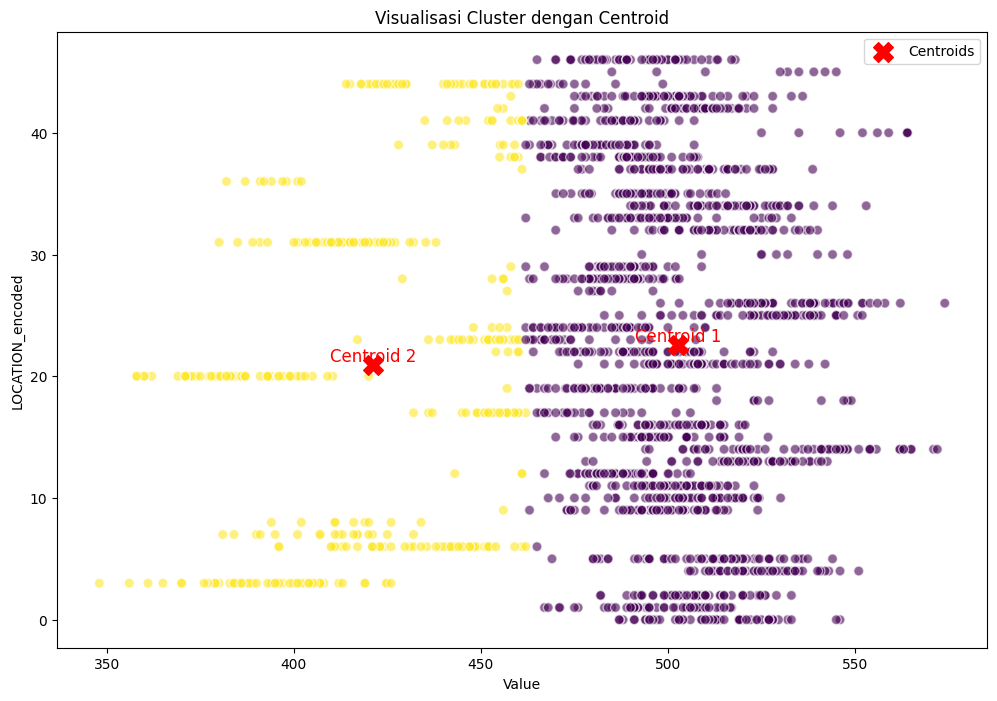

Nilai Centroids:
Centroid 1: Value = 502.72, LOCATION_encoded = 22.55
Centroid 2: Value = 421.22, LOCATION_encoded = 20.90


In [142]:
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data dengan label untuk setiap cluster
plt.scatter(data_selected['Value'], data_selected['LOCATION_encoded'], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='bottom')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Value')
plt.ylabel('LOCATION_encoded')
plt.legend()
plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Value = {centroid[0]:.2f}, LOCATION_encoded = {centroid[1]:.2f}")

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Statistik Deskriptif per Cluster:
          Value                                                             \
          count        mean        std    min        25%      50%      75%   
Cluster                                                                      
1        1700.0  502.741466  20.585367  462.0  488.33275  500.615  516.000   
2         387.0  421.328072  28.148017  348.0  400.38450  421.000  448.992   

               LOCATION_encoded                                               \
           max            count       mean        std  min   25%   50%   75%   
Cluster                                                                        
1        574.0           1700.0  22.552941  13.454482  0.0  12.0  22.0  34.0   
2        462.0            387.0  20.886305  13.753473  3.0   6.0  20.0  31.0   

               
          max  
Cluster        
1        46.0  
2        44.0  


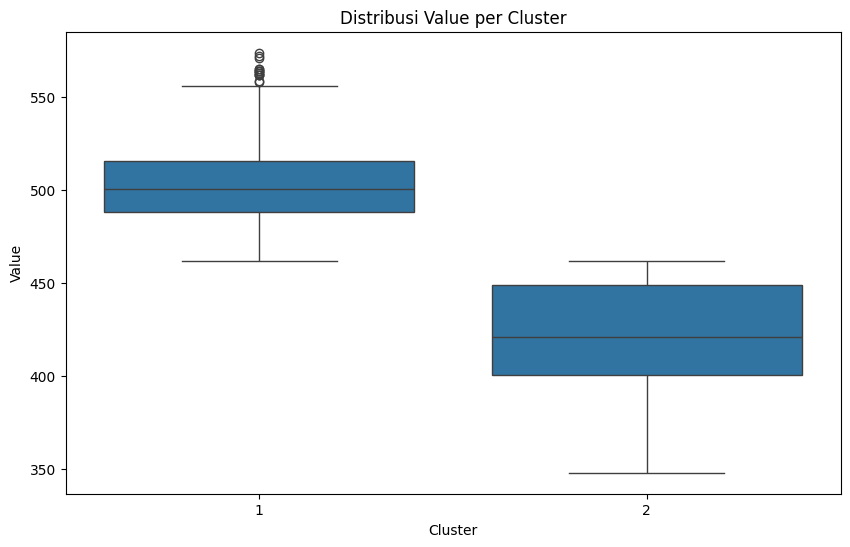

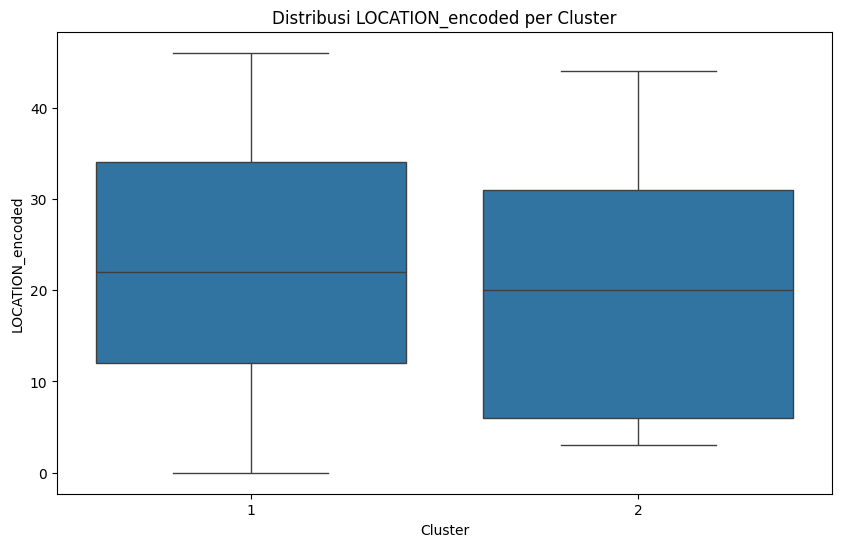

In [143]:
# Menambahkan kolom cluster ke data
data['Cluster'] = kmeans.labels_ + 1

# Menghitung statistik deskriptif per cluster
cluster_stats = data.groupby('Cluster')[['Value', 'LOCATION_encoded']].describe()
print("Statistik Deskriptif per Cluster:")
print(cluster_stats)

# Boxplot untuk melihat distribusi Value per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Value', data=data)
plt.title('Distribusi Value per Cluster')
plt.show()

# Boxplot untuk melihat distribusi LOCATION_encoded per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='LOCATION_encoded', data=data)
plt.title('Distribusi LOCATION_encoded per Cluster')
plt.show()

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans:


1. **Cluster 1**:  
  - **Value (PISA Score)**: 502.72  
  - **Location**: 22.55  
  - **Analisis**:  
  Negara-negara dalam cluster ini memiliki skor PISA **tinggi** (di atas rata-rata global), menunjukkan performa pendidikan yang kuat dalam membaca, matematika, dan sains. Distribusi lokasi yang lebih luas menunjukkan bahwa kekuatan ini mungkin tidak terbatas pada satu wilayah geografis tertentu, tetapi dapat ditemukan di berbagai kawasan regional, kemungkinan mencakup negara maju di Eropa Barat, Asia Timur, dan beberapa negara OECD lainnya.


2. **Cluster 2**:  
  - **Value (PISA Score)**: 421.22  
  - **Location**: 20.90  
  - **Analisis**:  
  Negara-negara dalam cluster ini memiliki skor PISA **rendah**, jauh di bawah rata-rata global, yang menunjukkan kelemahan dalam pendidikan di semua bidang (membaca, matematika, dan sains). Lokasi yang lebih terkonsentrasi dapat mengindikasikan kelemahan pendidikan yang spesifik untuk region tertentu, kemungkinan di kawasan dengan keterbatasan sumber daya pendidikan seperti Afrika Sub-Sahara, Asia Selatan, atau Amerika Latin.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [144]:
# Menyimpan data yang sudah berklaster ke dalam file CSV
data.to_csv('dataset_calssification.csv', index=False)
print("Data berhasil disimpan.")

Data berhasil disimpan.
